In [1]:
import numpy as np 
import pandas as pd
import os
from Dataset.Utils import prepare_data_range
from Dataset.Resample import resample

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
embeds_paths = "/mnt/d/ML/Kaggle/CAFA6-new/Dataset/t5_embeds/train_embeds.npy"
ids_paths = "/mnt/d/ML/Kaggle/CAFA6-new/Dataset/t5_embeds/train_ids.npy"

In [8]:
BASE_PATH = "/mnt/d/ML/Kaggle/CAFA6/cafa-6-protein-function-prediction/"
train_terms_df = pd.read_csv(os.path.join(BASE_PATH, 'Train/train_terms.tsv'), sep='\t')
print(f"Training terms loaded. Shape: {train_terms_df.shape}")
train_fasta_path = os.path.join(BASE_PATH, 'Train/train_sequences.fasta')



# loading embeddings
print("Loading training embeddings...")
train_embeds = np.load(embeds_paths)
train_ids = np.load(ids_paths)
print(f"Training embeddings loaded. Shape: {train_embeds.shape}")

Training terms loaded. Shape: (537027, 3)
Loading training embeddings...
Training embeddings loaded. Shape: (142246, 1024)
Training embeddings loaded. Shape: (142246, 1024)


In [5]:
train_terms_df.keys()

Index(['EntryID', 'term', 'aspect'], dtype='object')

In [6]:
corr_dict =  {}


def pairwise_dependace(labels, figsize=(10, 8)):
    """
    Create a correlation heatmap for label co-occurrence.
    
    Args:
        labels: Binary label matrix of shape (n_samples, n_labels)
        figsize: Tuple for figure size
    
    Returns:
        label_corr: Correlation matrix between labels
    """
    
    # Calculate correlation matrix between labels
    label_corr = np.corrcoef(labels.T)
    
    # Create heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(label_corr, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Label Co-occurrence Correlation Matrix')
    plt.xlabel('Label Index')
    plt.ylabel('Label Index')
    plt.tight_layout()
    plt.show()
    
    return label_corr

## Range 1 - 65

In [9]:
data = prepare_data_range(train_terms_df, train_ids, train_embeds, top_range=[1, 65])
data['labels'].shape

(55224, 64)

In [ ]:
terms = np.load('/mnt/d/ML/Kaggle/CAFA6-new/checkpoints/default_run/top_terms.npy', allow_pickle=True)

array(['GO:0005634', 'GO:0005829', 'GO:0005886', 'GO:0005737',
       'GO:0005739', 'GO:0005654', 'GO:0016020', 'GO:0042802',
       'GO:0005576', 'GO:0005783', 'GO:0005615', 'GO:0045944',
       'GO:0070062', 'GO:0005794', 'GO:0005730', 'GO:0042803',
       'GO:0003723', 'GO:0000122', 'GO:0009507', 'GO:0003677',
       'GO:0006355', 'GO:0005789', 'GO:0045893', 'GO:0032991',
       'GO:0003700', 'GO:0043565', 'GO:0003729', 'GO:0005743',
       'GO:0009536', 'GO:0009986', 'GO:0045892', 'GO:0000976',
       'GO:0098978', 'GO:0000785', 'GO:0000978', 'GO:0048471',
       'GO:0006357', 'GO:0010628', 'GO:0004674', 'GO:0007165',
       'GO:0043025', 'GO:0031012', 'GO:0003735', 'GO:0005813',
       'GO:0003682', 'GO:0006974', 'GO:0043066', 'GO:0005759',
       'GO:0001228', 'GO:0005524', 'GO:0009506', 'GO:0000139',
       'GO:0008284', 'GO:0044877', 'GO:0008270', 'GO:0005768',
       'GO:0019901', 'GO:0030425', 'GO:0016324', 'GO:0007283',
       'GO:0004672', 'GO:0009410', 'GO:0030424', 'GO:00

In [11]:
data['top_terms']

['GO:0005634',
 'GO:0005829',
 'GO:0005886',
 'GO:0005737',
 'GO:0005739',
 'GO:0005654',
 'GO:0016020',
 'GO:0042802',
 'GO:0005576',
 'GO:0005783',
 'GO:0005615',
 'GO:0045944',
 'GO:0070062',
 'GO:0005794',
 'GO:0005730',
 'GO:0042803',
 'GO:0003723',
 'GO:0000122',
 'GO:0009507',
 'GO:0003677',
 'GO:0006355',
 'GO:0005789',
 'GO:0045893',
 'GO:0032991',
 'GO:0003700',
 'GO:0043565',
 'GO:0003729',
 'GO:0005743',
 'GO:0009536',
 'GO:0009986',
 'GO:0045892',
 'GO:0000976',
 'GO:0098978',
 'GO:0000785',
 'GO:0000978',
 'GO:0048471',
 'GO:0006357',
 'GO:0010628',
 'GO:0004674',
 'GO:0007165',
 'GO:0043025',
 'GO:0031012',
 'GO:0003735',
 'GO:0005813',
 'GO:0003682',
 'GO:0006974',
 'GO:0043066',
 'GO:0005759',
 'GO:0001228',
 'GO:0005524',
 'GO:0009506',
 'GO:0000139',
 'GO:0008284',
 'GO:0044877',
 'GO:0008270',
 'GO:0005768',
 'GO:0019901',
 'GO:0030425',
 'GO:0016324',
 'GO:0007283',
 'GO:0004672',
 'GO:0009410',
 'GO:0030424',
 'GO:0045202']

In [8]:
sampled_idx = resample(data, train_terms_df, strategy='log_pos', I=200000)
sampled_idx = np.array(sampled_idx)
np.unique(sampled_idx).shape

(21274,)

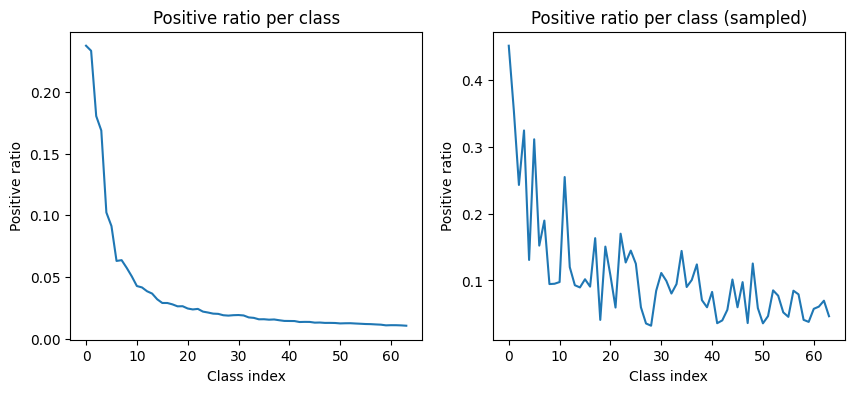

In [11]:
#plot for both side-by side
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

pos_ratio = data['labels'].sum(axis=0) / data['labels'].shape[0]

ax[0].plot(pos_ratio)
ax[0].set_title('Positive ratio per class')
ax[0].set_xlabel('Class index')
ax[0].set_ylabel('Positive ratio')

pos_ratio_sampled = data['labels'][sampled_idx].sum(axis=0) / data['labels'][sampled_idx].shape[0]
ax[1].plot(pos_ratio_sampled)
ax[1].set_title('Positive ratio per class (sampled)')
ax[1].set_xlabel('Class index')
ax[1].set_ylabel('Positive ratio')

plt.show()

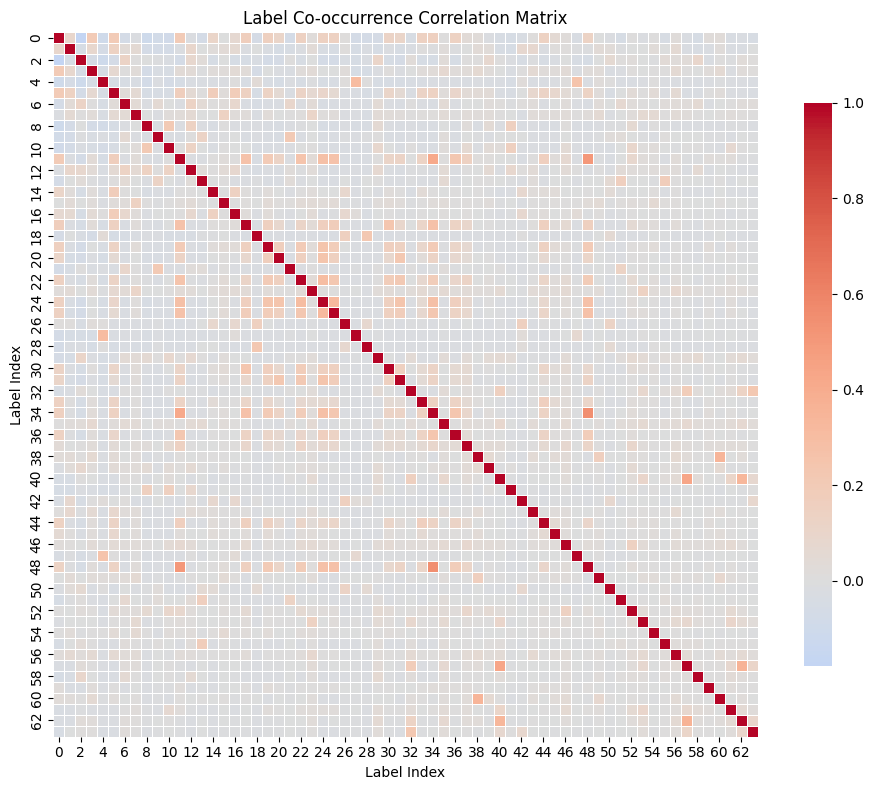

Total correlation: 59.026712458090756


In [15]:
label_corr = pairwise_dependace(data['labels'])
corr = label_corr.sum() / 2
corr_list.append(corr)
print(f'Total correlation: {corr}')

## Range 66 - 130

In [21]:
data = prepare_data_range(train_terms_df, train_ids, train_embeds, top_range=[66, 130])
data['labels'].shape

(20044, 64)

In [22]:
sampled_idx = resample(data, train_terms_df, strategy='log_pos', I=200000)
sampled_idx = np.array(sampled_idx)
np.unique(sampled_idx).shape

(5801,)

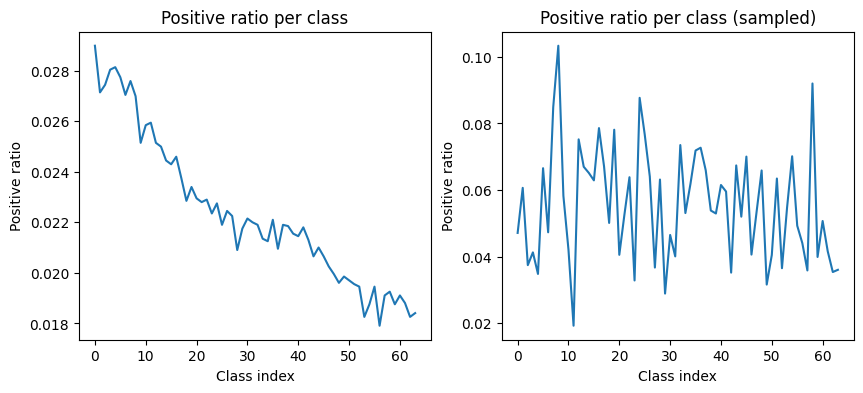

In [23]:
#plot for both side-by side
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

pos_ratio = data['labels'].sum(axis=0) / data['labels'].shape[0]

ax[0].plot(pos_ratio)
ax[0].set_title('Positive ratio per class')
ax[0].set_xlabel('Class index')
ax[0].set_ylabel('Positive ratio')

pos_ratio_sampled = data['labels'][sampled_idx].sum(axis=0) / data['labels'][sampled_idx].shape[0]
ax[1].plot(pos_ratio_sampled)
ax[1].set_title('Positive ratio per class (sampled)')
ax[1].set_xlabel('Class index')
ax[1].set_ylabel('Positive ratio')

plt.show()

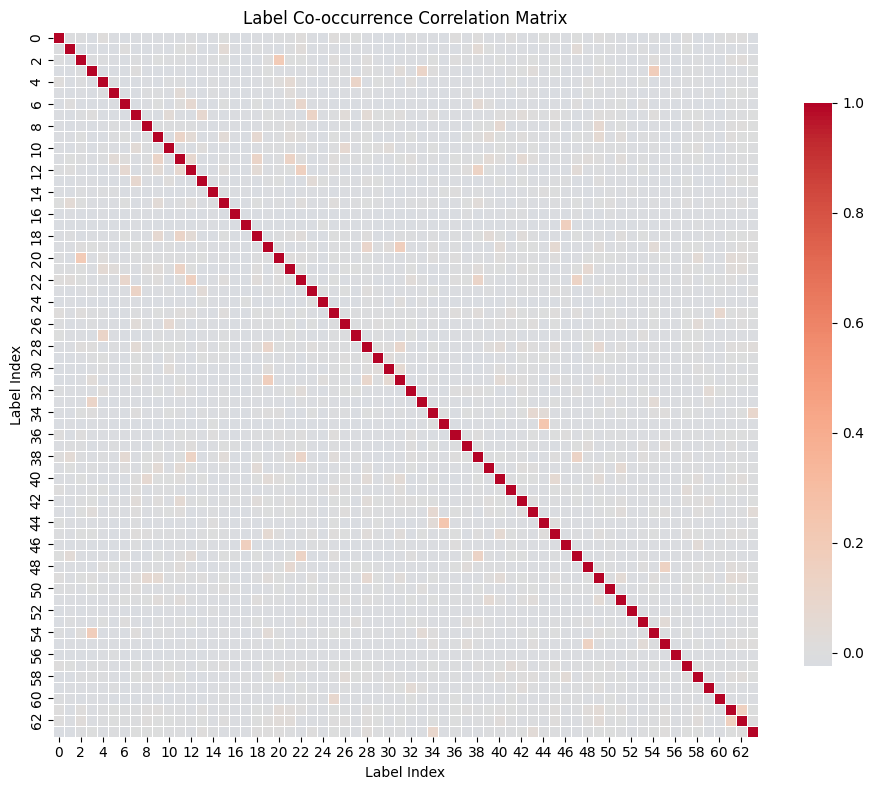

Total correlation: 13.691890592973568


In [33]:
label_corr = pairwise_dependace(data['labels'])
corr = label_corr.sum() / 2
corr_dict['66-130'] = corr.item()
print(f'Total correlation: {corr}')

In [34]:
corr_dict

{'1-65': 59.026712458090756, '66-130': 13.691890592973568}

## Range 130 - 194

In [35]:
data = prepare_data_range(train_terms_df, train_ids, train_embeds, top_range=[131, 195])
data['labels'].shape

(14923, 64)

In [36]:
sampled_idx = resample(data, train_terms_df, strategy='log_pos', I=200000)
sampled_idx = np.array(sampled_idx)
np.unique(sampled_idx).shape

(3724,)

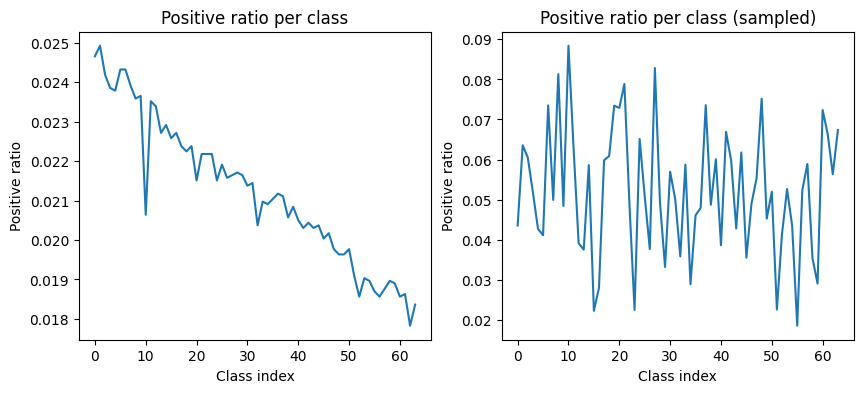

In [38]:
#plot for both side-by side
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

pos_ratio = data['labels'].sum(axis=0) / data['labels'].shape[0]

ax[0].plot(pos_ratio)
ax[0].set_title('Positive ratio per class')
ax[0].set_xlabel('Class index')
ax[0].set_ylabel('Positive ratio')

pos_ratio_sampled = data['labels'][sampled_idx].sum(axis=0) / data['labels'][sampled_idx].shape[0]
ax[1].plot(pos_ratio_sampled)
ax[1].set_title('Positive ratio per class (sampled)')
ax[1].set_xlabel('Class index')
ax[1].set_ylabel('Positive ratio')

plt.show()

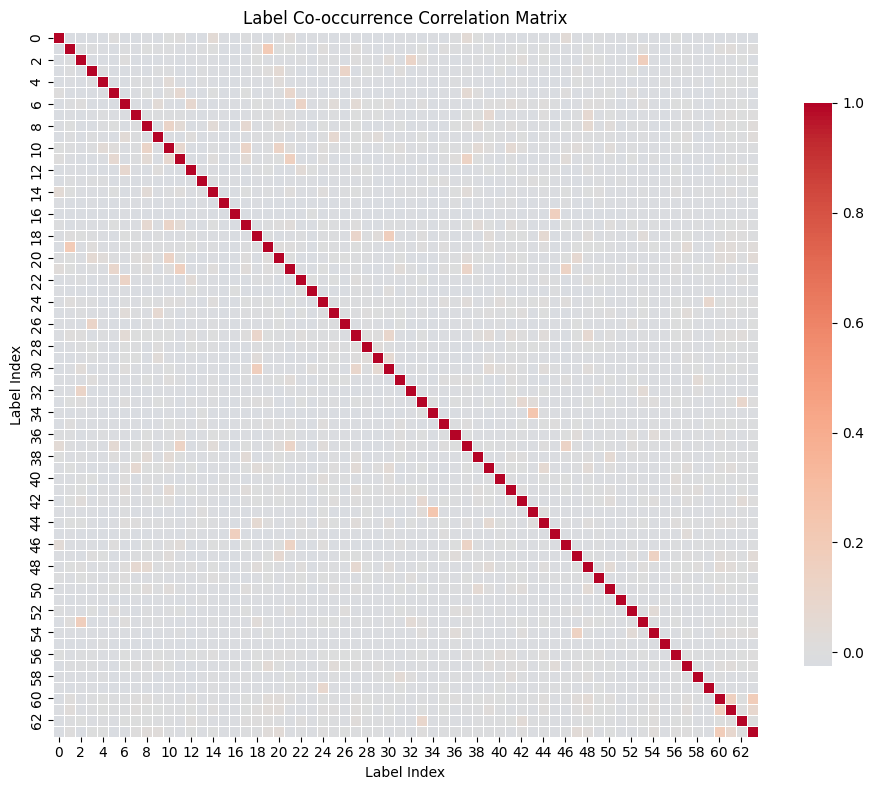

Total correlation: 13.998719771741689


In [39]:
label_corr = pairwise_dependace(data['labels'])
corr = label_corr.sum() / 2
corr_dict['131-195'] = corr.item()
print(f'Total correlation: {corr}')

## Range 195 - 259

In [44]:
data = prepare_data_range(train_terms_df, train_ids, train_embeds, top_range=[195, 259])
data['labels'].shape

(11839, 64)

In [45]:
sampled_idx = resample(data, train_terms_df, strategy='log_pos', I=200000)
sampled_idx = np.array(sampled_idx)
np.unique(sampled_idx).shape

(2433,)

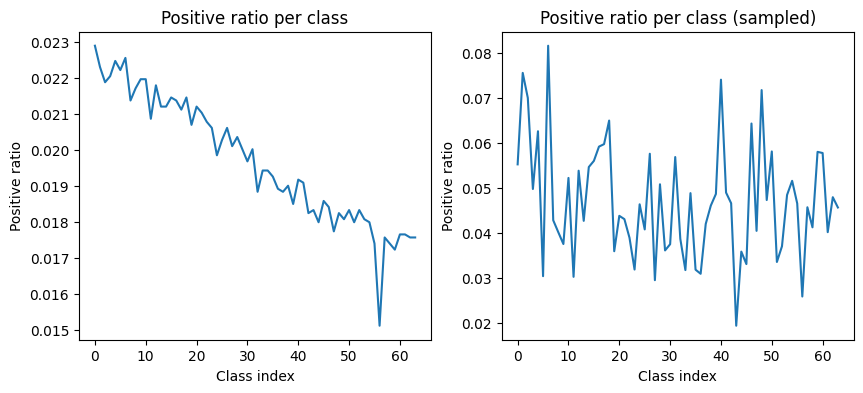

In [46]:
#plot for both side-by side
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

pos_ratio = data['labels'].sum(axis=0) / data['labels'].shape[0]

ax[0].plot(pos_ratio)
ax[0].set_title('Positive ratio per class')
ax[0].set_xlabel('Class index')
ax[0].set_ylabel('Positive ratio')

pos_ratio_sampled = data['labels'][sampled_idx].sum(axis=0) / data['labels'][sampled_idx].shape[0]
ax[1].plot(pos_ratio_sampled)
ax[1].set_title('Positive ratio per class (sampled)')
ax[1].set_xlabel('Class index')
ax[1].set_ylabel('Positive ratio')

plt.show()

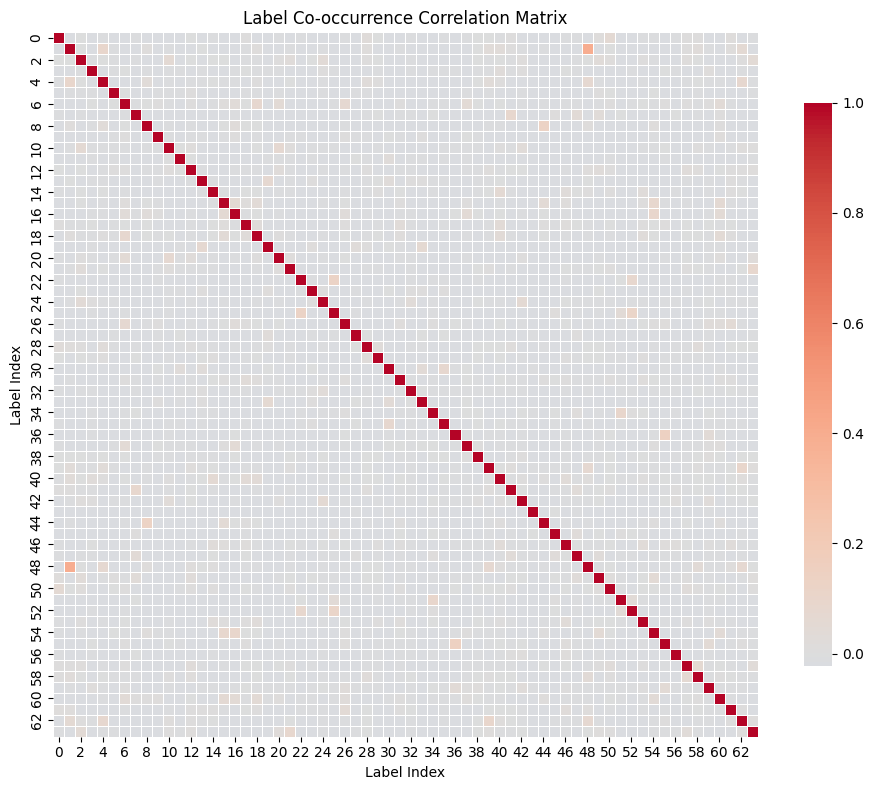

Total correlation: 9.52819520431581


In [47]:
label_corr = pairwise_dependace(data['labels'])
corr = label_corr.sum() / 2
corr_dict['195 - 259'] = corr.item()
print(f'Total correlation: {corr}')

## Range 260 - 320

In [49]:
data = prepare_data_range(train_terms_df, train_ids, train_embeds, top_range=[260, 324])
data['labels'].shape

(10066, 64)

In [50]:
sampled_idx = resample(data, train_terms_df, strategy='log_pos', I=200000)
sampled_idx = np.array(sampled_idx)
np.unique(sampled_idx).shape

(1732,)

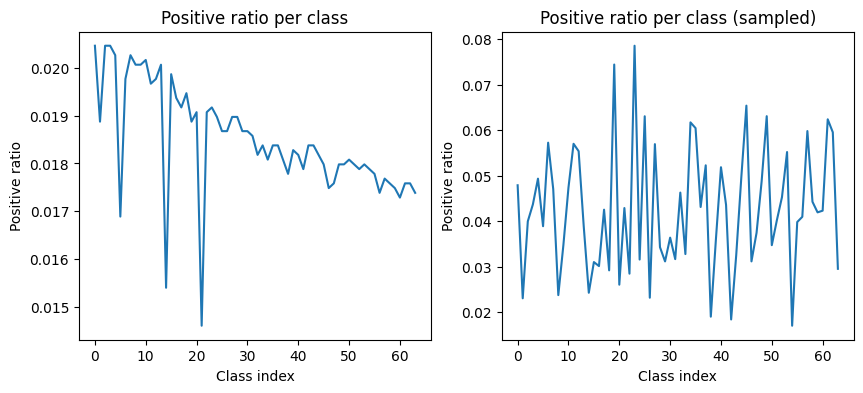

Average positive ratio: 	 	 0.018510642261076894
Average positive ratio (sampled): 	 0.04259859375


In [60]:
#plot for both side-by side
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

pos_ratio = data['labels'].sum(axis=0) / data['labels'].shape[0]

ax[0].plot(pos_ratio)
ax[0].set_title('Positive ratio per class')
ax[0].set_xlabel('Class index')
ax[0].set_ylabel('Positive ratio')

pos_ratio_sampled = data['labels'][sampled_idx].sum(axis=0) / data['labels'][sampled_idx].shape[0]
ax[1].plot(pos_ratio_sampled)
ax[1].set_title('Positive ratio per class (sampled)')
ax[1].set_xlabel('Class index')
ax[1].set_ylabel('Positive ratio')

plt.show()

#print avg pos ratio
avg_pos_ratio = data['labels'].sum() / (data['labels'].shape[0] * data['labels'].shape[1])
print(f'Average positive ratio: \t \t {avg_pos_ratio}')   

avg_pos_ratio_sampled = data['labels'][sampled_idx].sum() / (data['labels'][sampled_idx].shape[0] * data['labels'][sampled_idx].shape[1])
print(f'Average positive ratio (sampled): \t {avg_pos_ratio_sampled}')

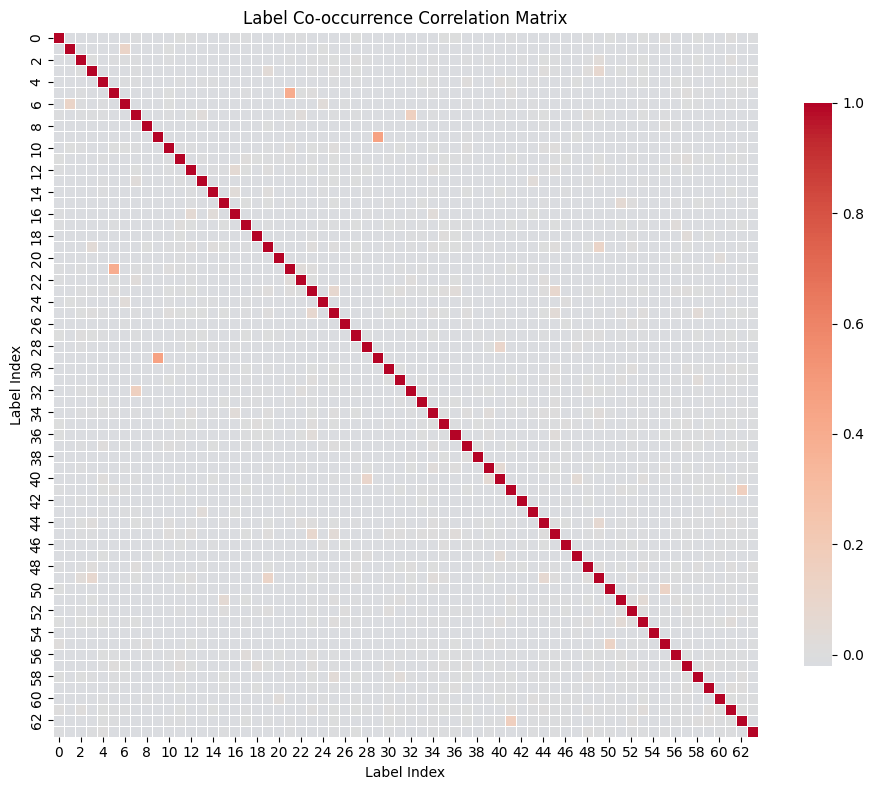

Total correlation: 6.713287195748884


In [53]:
label_corr = pairwise_dependace(data['labels'])
corr = label_corr.sum() / 2
corr_dict['260-324'] = corr.item()
print(f'Total correlation: {corr}')